# Banking Subscription

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Problem Statement:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

******************************************************************************************

### Intial Observations:

- Dataset - 41188 observations/rows
- 20 feature columns and 1 target column
- 10 categorical feature columns and 10 numeric feature columns
- Duration feature column (Numeric) to be used only for benchmarking as per the problem statement document since this feature highly affects the target column
- There are multiple records in the dataset that can pertain to the same client. Hence we can check if there are duplicate rows in the dataset. What if there are duplicate rows and they are classified differently. The learning will not happen correctly? May be we should remove these duplicates?

In [2]:
# Importing necessary librabies

import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [4]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [5]:
# Importing the csv dataset using pandas. Dataset seperated by semicolon

bkdf = pd.read_csv(r'C:\Users\Anu\Documents\Data Science - Course\Ineuron ML challenge\ML Challenge 3\Banking subscription\Prj_Files\bank-additional-full.csv', sep = ';')

In [6]:
#Checking for duplicate rows

bkdf.duplicated().sum()

12

In [7]:
# Assigning target column to y and dropping the target column from the dataframe bkdf so as retain only feature columns in the df
# Also dropping duration column from feature column list : Since this feature is to be used for benchmarking purpose only (The purpose of building a predictive model is being able to determine the outcome based on which the decision of contacting the customer can be made)

y = bkdf['y']
x = bkdf.drop(['y','duration'],axis = 1)

In [8]:
# Dataset has 41188 rows and 20 columns including the target column

x.shape, y.shape

((41188, 19), (41188,))

In [9]:
x.info()

# Observation - No columns have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [10]:
x.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# Check the distribution of the numerical features

x_dist = pd.DataFrame(data = bkdf, columns = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])

In [12]:
x_dist

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [13]:
import matplotlib

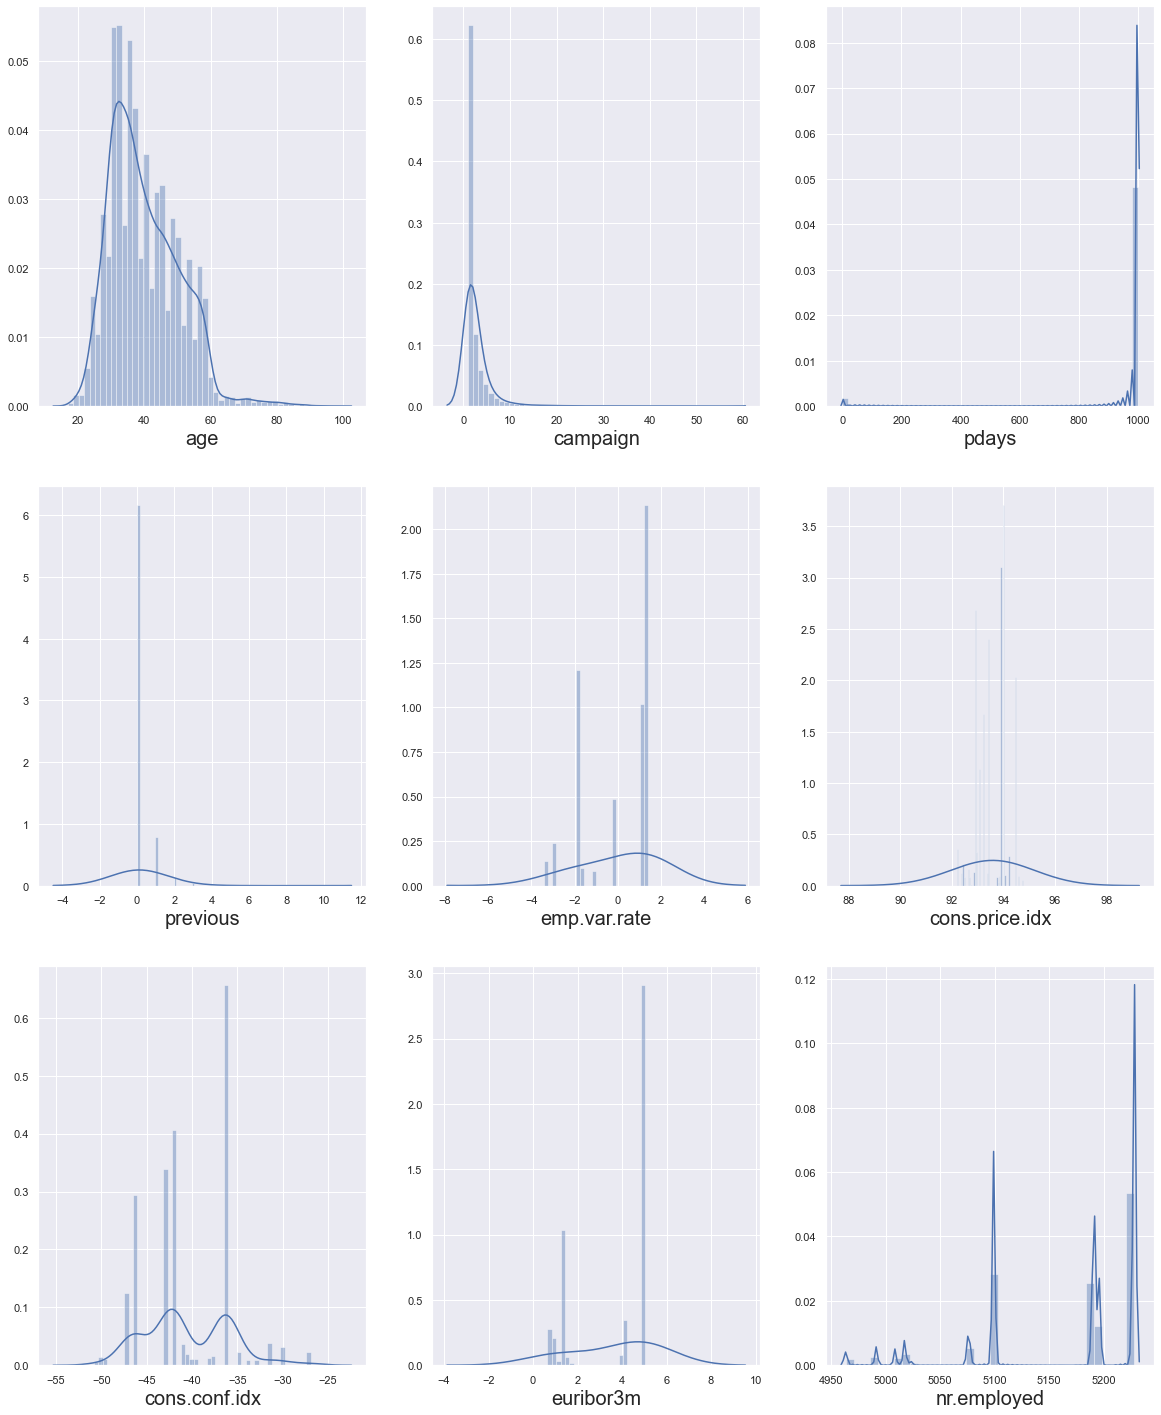

In [14]:
# let's see how data is distributed for every numerical column. Most of the data are descrete

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_dist:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_dist[column],kde_kws={'bw': 1.5})
        #sns.distplot(new_data[column],kde_kws={'bw': 0.1})
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
x.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000


In [17]:
x.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [18]:
# Looking at the how the values are distributed for the below attrbutes

# ['age'].value_counts()
# x['emp.var.rate'].value_counts()
# x['cons.price.idx'].value_counts()
# x['cons.conf.idx'].value_counts()
# x['euribor3m'].value_counts()
# x['nr.employed'].value_counts()
# x['campaign'].value_counts()
# x['pdays'].value_counts()
# x['previous'].value_counts()

# Unknown Job count - 330
# x['job'].value_counts()

# unknown count - 80
# x['marital'].value_counts()

# unknown count - 1731
# x['education'].value_counts()

# unknown count - 8597
# x['default'].value_counts()

# unknown count - 990
# x['housing'].value_counts()

# unknown count - 990
# x['loan'].value_counts()

# nonexistent value count - 35563
# x['poutcome'].value_counts()

# 999 value count - 39673
# x['pdays'].value_counts()

In [19]:
# Probability of target variable = 'yes' for pdays = 999 is 0.09(9 percent) 

# (bkdf['pdays'] == 999).sum()
# (bkdf['y'] == 'yes').sum()
# (bkdf['y'] == 'no').sum()

(bkdf[bkdf['pdays'] == 999 ]['y'] == 'yes').sum()/(bkdf['pdays'] == 999).sum()

0.09258185667834548

In [20]:
#Probablity values of target variable for each value of pdays column for probability encoding

bkdf.groupby('pdays')['y'].value_counts()/bkdf.groupby('pdays')['y'].count()

# bkdf.groupby('pdays')['y'].value_counts()

# bkdf.groupby('pdays')['y'].value_counts()

pdays  y  
0      yes    0.666667
       no     0.333333
1      no     0.692308
       yes    0.307692
2      yes    0.606557
       no     0.393443
3      yes    0.678815
       no     0.321185
4      yes    0.533898
       no     0.466102
5      yes    0.630435
       no     0.369565
6      yes    0.701456
       no     0.298544
7      yes    0.666667
       no     0.333333
8      yes    0.666667
       no     0.333333
9      yes    0.546875
       no     0.453125
10     yes    0.576923
       no     0.423077
11     yes    0.535714
       no     0.464286
12     no     0.551724
       yes    0.448276
13     yes    0.777778
       no     0.222222
14     yes    0.550000
       no     0.450000
15     yes    0.666667
       no     0.333333
16     yes    0.545455
       no     0.454545
17     no     0.750000
       yes    0.250000
18     yes    0.571429
       no     0.428571
19     no     0.666667
       yes    0.333333
20     no     1.000000
21     yes    1.000000
22     yes    0.666667


In [21]:
bkdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Proposed Steps:

- pdays - look into the value 999 and see if there is a requirement for any manipulation
- Not removing duplicate rows before of following reasons - There are other attributes that can influence the same client to make a different choice like day/ month called on and social and economic context attributes.
- Check for null values in the dataset
- Categorical data conversion to numerical data - One hot encoding
- Try hamming distance for only categorical data and check for score using KNN
- Check for the number of unknown values for the categorical columns
- Look at Data distribution of all columns including target column

In [22]:
# Check for presence of null values in the dataset

x.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [23]:
# Converting Categorical Column into numerical using get dummies

x = pd.get_dummies(x, columns = ['job','marital','default','housing','loan','month','day_of_week','poutcome'])

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  object 
 2   contact               41188 non-null  object 
 3   campaign              41188 non-null  int64  
 4   pdays                 41188 non-null  int64  
 5   previous              41188 non-null  int64  
 6   emp.var.rate          41188 non-null  float64
 7   cons.price.idx        41188 non-null  float64
 8   cons.conf.idx         41188 non-null  float64
 9   euribor3m             41188 non-null  float64
 10  nr.employed           41188 non-null  float64
 11  job_admin.            41188 non-null  uint8  
 12  job_blue-collar       41188 non-null  uint8  
 13  job_entrepreneur      41188 non-null  uint8  
 14  job_housemaid         41188 non-null  uint8  
 15  job_management     

In [25]:
# For Education, we can use custom mapping to encode as there is an inherent order in the categories except for the 
# 'unknown' value. We will first replace the unknown values to nan and then use KNN Imputer to impute all the columns

x['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [26]:
# Replacing the unknown value to nan

x['education'].replace(to_replace ={'unknown':np.nan},inplace = True)

In [27]:
x['education'] = x['education'].map({'illiterate':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'university.degree':6,'professional.course':7,'unknown':np.nan})

In [28]:
x['education'].value_counts()

6.0    12168
5.0     9515
4.0     6045
7.0     5243
2.0     4176
3.0     2292
1.0       18
Name: education, dtype: int64

In [29]:
# Checking to confirm if the nan change has happened correctly on the education column

x['education'].isna().sum()

1731

In [30]:
x['education'].unique()

array([ 2.,  5.,  3.,  4.,  7., nan,  6.,  1.])

In [31]:
# Encode the contact column using one hot encoding

x['contact'] = x['contact'].map({'cellular':0,'telephone':1})

In [32]:
x['contact'].value_counts()

0    26144
1    15044
Name: contact, dtype: int64

In [33]:
# Since the value of the rows = 999 for the pdays column when the customer is not contacted and there is a
# big margin from the other values in the column, the learning process may give this value higher importance
# Hence we will replace this value with the mean of the values in this column corresponding to the target 

x['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [34]:
# Check of the data is Imbalanced. 
# 'Yes' target is considerable less compared to the 'No' target scenarios. Hence we will take care of the same using upsampling

y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [35]:
# Convert the target variable to numerical values using mapping

y = y.map({'no':0,'yes':1})
#y.value_counts()

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             39457 non-null  float64
 2   contact               41188 non-null  int64  
 3   campaign              41188 non-null  int64  
 4   pdays                 41188 non-null  int64  
 5   previous              41188 non-null  int64  
 6   emp.var.rate          41188 non-null  float64
 7   cons.price.idx        41188 non-null  float64
 8   cons.conf.idx         41188 non-null  float64
 9   euribor3m             41188 non-null  float64
 10  nr.employed           41188 non-null  float64
 11  job_admin.            41188 non-null  uint8  
 12  job_blue-collar       41188 non-null  uint8  
 13  job_entrepreneur      41188 non-null  uint8  
 14  job_housemaid         41188 non-null  uint8  
 15  job_management     

In [37]:
# Imputing null values using KNN imputer

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(x) # impute the missing values

# convert the nd-array returned in the step above to a Dataframe

new_data=pd.DataFrame(data=np.round(new_array), columns=x.columns)

In [38]:
new_data.head()

,age,education,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,2.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.0,5.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,5.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.0,3.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56.0,5.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# Check to confirm that the imputation step has imputed the null values

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  float64
 1   education             41188 non-null  float64
 2   contact               41188 non-null  float64
 3   campaign              41188 non-null  float64
 4   pdays                 41188 non-null  float64
 5   previous              41188 non-null  float64
 6   emp.var.rate          41188 non-null  float64
 7   cons.price.idx        41188 non-null  float64
 8   cons.conf.idx         41188 non-null  float64
 9   euribor3m             41188 non-null  float64
 10  nr.employed           41188 non-null  float64
 11  job_admin.            41188 non-null  float64
 12  job_blue-collar       41188 non-null  float64
 13  job_entrepreneur      41188 non-null  float64
 14  job_housemaid         41188 non-null  float64
 15  job_management     

In [40]:
new_data['education'].value_counts()

6.0    12534
5.0    10070
4.0     6467
7.0     5292
2.0     4230
3.0     2577
1.0       18
Name: education, dtype: int64

In [41]:
top_10_col = new_data.columns.tolist()[:10]
top_10_col.remove('pdays')

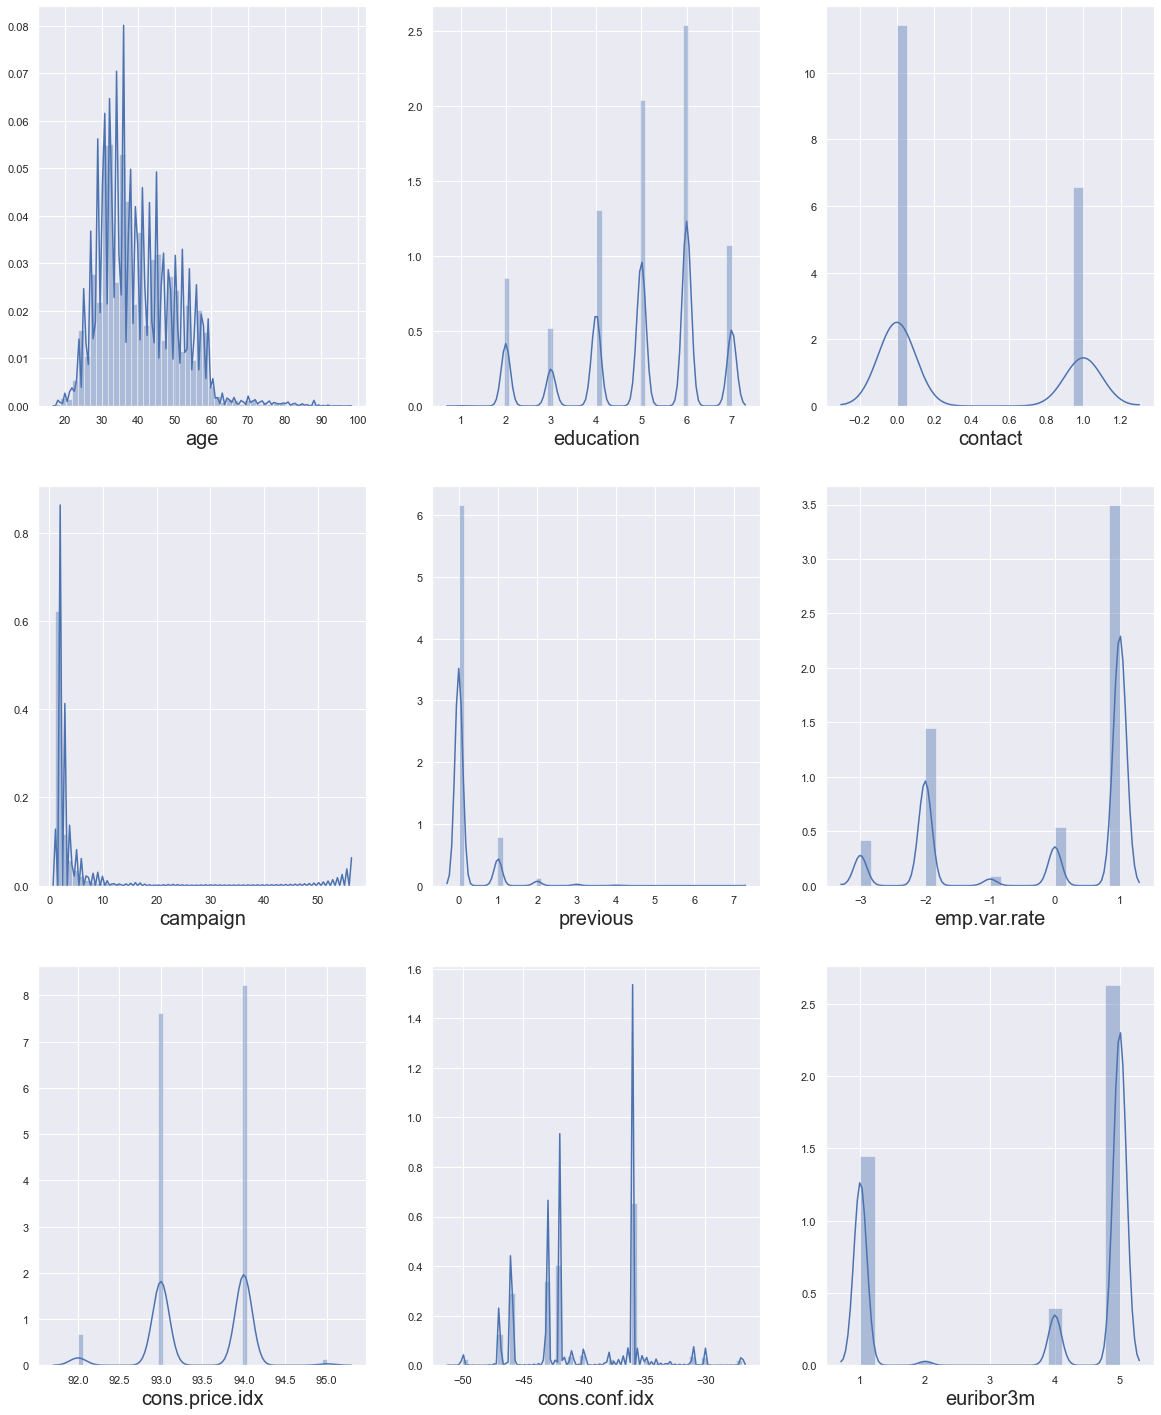

In [42]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in top_10_col:
    if plotnumber<=11 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column],kde_kws={'bw': 0.1})
        plt.xlabel(str(column),fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

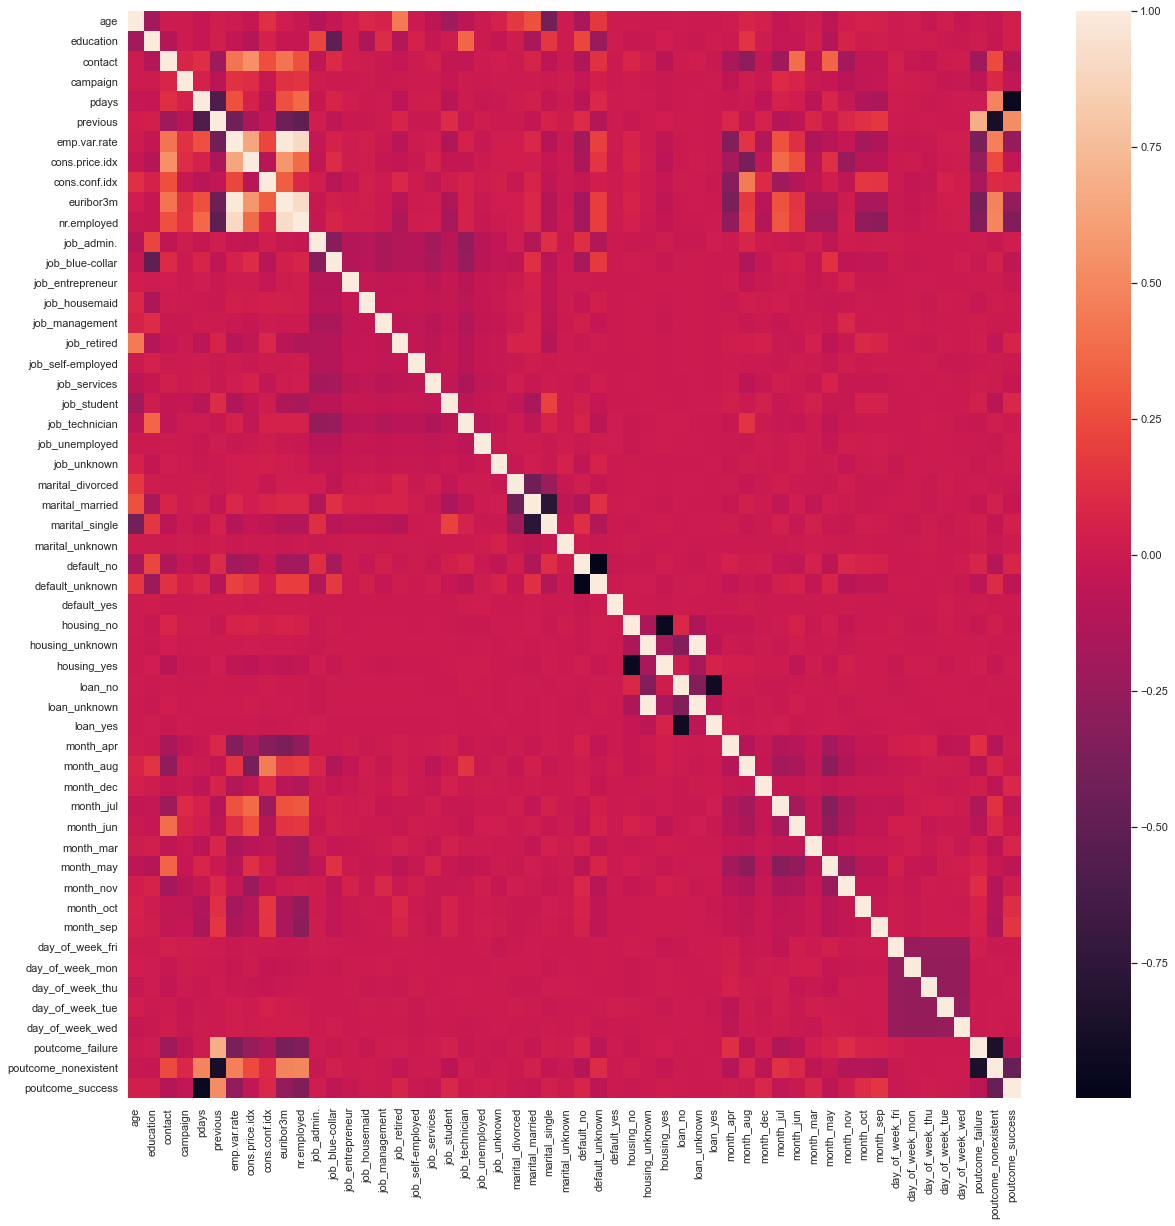

In [43]:
# Check the heatmap

plt.figure(figsize = (20,20))
sns.heatmap(new_data.corr())

In [44]:
new_data.duplicated().sum()

2725

In [45]:
# Use standard scalar to scale the dataset

scalar = StandardScaler()
X_scaled = scalar.fit_transform(new_data)

In [43]:
# Train test split of the dataset

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [44]:
y_test.shape

(10297,)

In [45]:
y_test.value_counts()

0    9122
1    1175
Name: y, dtype: int64

### Classification using Logistic Regression Algorithm:

In [46]:
# We will first apply logistic regression algorithm on the train dataset

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Prediction on the test dataset

y_pred = log_reg.predict(x_test)

In [48]:
# Compute Accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8990968243177625

In [ ]:
# Observation - Logistic Regression given us an accuracy close to 90%

In [49]:
# Check the confusion matrix to evaluate the model

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[8999,  123],
       [ 916,  259]], dtype=int64)

In [50]:
8999+123+916+259

10297

In [51]:
np.unique(y_pred, return_counts = True)

(array([0, 1], dtype=int64), array([9915,  382], dtype=int64))

In [52]:
# !pip install imblearn

### Using upsampling to balance the dataset and then using Logistic Regression algorithm

In [ ]:
# We will balance the data set for the target column using over sampling and then validate the model 
# again using hold-out cross validation

In [53]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(X_scaled,y)

In [54]:
# Check

y_sampled.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [55]:
type(y_sampled)
x_sampled.shape

(73096, 54)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled, test_size= 0.25, random_state = 355)

In [57]:
x_test.shape

(18274, 54)

In [58]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
y_pred = log_reg.predict(x_test)

In [73]:
# Observation - We see that the accuracy score has now come down from 90% to close to 75% after the upsampling 
# step which seems to be more realistic

log_reg.score(x_test,y_test)

0.7450476086242749

In [61]:
# Accuracy score for Logistic Regression is:

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7450476086242749

In [62]:
# Results of the confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[7831, 1300],
       [3359, 5784]], dtype=int64)

In [63]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[7831, 1300],
       [3359, 5784]], dtype=int64)

In [70]:
# Using 5-Fold cross validation to train the model and then checking the accuracy on the test data

from sklearn.model_selection import cross_val_score

In [71]:
cvlog = cross_val_score(log_reg,x_train,y_train,cv = 5,n_jobs = -1)
cvlog

array([0.74491564, 0.73980848, 0.73750456, 0.7391463 , 0.74014958])

In [74]:
y_pred = log_reg.predict(x_test)

#### Accuracy using Logistic Regression:

In [75]:
accuracy_score(y_test,y_pred)

0.7450476086242749

### Classification using KNN Algorithm:

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [65]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
cvknn = cross_val_score(knn,x_train,y_train,cv = 3,n_jobs = -1)

In [77]:
cvknn

array([0.81760972, 0.81875889, 0.81733611])

In [78]:
y_knn_pred = knn.predict(x_test)

In [79]:
# below score is less reliable because it is a training score without K fold cross validation

knn.score(x_train,y_train)

0.9068622086023859

#### Accuracy using KNN is:

In [80]:
accuracy_score(y_test,y_knn_pred)

0.8647258399912444

In [70]:
print(dir(y_knn_pred))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

In [81]:
type(y_knn_pred)
np.unique(y_knn_pred, return_counts = True)

(array([0, 1], dtype=int64), array([ 7093, 11181], dtype=int64))

In [83]:
conf_mat = confusion_matrix(y_test,y_knn_pred)
conf_mat

array([[6876, 2255],
       [ 217, 8926]], dtype=int64)

TP = 6876
FP = 2255
FN = 164
TN = 8979

The Positives here are the target '0' and the Negetives are the target '1'. 

# Using Hyperparameter tunning with KNN classifier

In [84]:
# Lets try to do hyperparameter tunning with KNN and then do the predict and accuracy again

#param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
#               'leaf_size' : [18,20,25,27,30,32,34],
#               'n_neighbors' : [3,5,7,9,10,11,12,13]
#              }

param_grid = {'algorithm': ['ball_tree','kd_tree','brute'],
              'leaf_size':[18,20,25],
              'n_neighbors':[3,5,7]
             }


In [85]:
gridsearch = GridSearchCV(knn,param_grid,n_jobs = -1,verbose = 3)

In [ ]:
# gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 14.9min


In [89]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [106]:
gridsearch.best_score_

0.8810696433363228

In [107]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [91]:
knn_new = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',leaf_size=18,n_jobs= -1)

In [92]:
knn_new.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
y_new_pred = knn_new.predict(x_test)

In [95]:
knn_new.score(x_test,y_test)

0.9025938491846339

#### Accuracy after hyperparameter tunning with KNN:

In [97]:
acc_new = accuracy_score(y_test,y_new_pred)
acc_new

0.9025938491846339

In [105]:
y_test.value_counts()

1    9143
0    9131
Name: y, dtype: int64

In [103]:
np.unique(y_new_pred,return_counts = True)

(array([0, 1], dtype=int64), array([ 7517, 10757], dtype=int64))

In [99]:
con_new = confusion_matrix(y_test,y_new_pred)
con_new

array([[7434, 1697],
       [  83, 9060]], dtype=int64)

In [ ]:
# Hyperparameter tunning using KNN algorithm and GridsearchCV has improved the accuracy to above 90%.

# Using PCA to reduce dimensions and then build models

In [46]:
# DataFrame that we had converted to standard scalar form is given below. Convert the array into dataframe

# X_scaled
x_pca = pd.DataFrame(data = X_scaled,columns = x.columns)

In [47]:
X_scaled

array([[ 1.53303429, -2.02227629,  1.31826996, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 1.62899323,  0.02091742,  1.31826996, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564,  0.02091742,  1.31826996, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429,  0.70198199, -0.75856997, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.38152696,  1.38304656, -0.75856997, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 3.26029527,  1.38304656, -0.75856997, ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [48]:
x_pca

,age,education,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,-2.022276,1.31827,-0.565922,0.195414,-0.349494,0.763307,0.901357,0.946440,0.760688,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
1,1.628993,0.020917,1.31827,-0.565922,0.195414,-0.349494,0.763307,0.901357,0.946440,0.760688,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
2,-0.290186,0.020917,1.31827,-0.565922,0.195414,-0.349494,0.763307,0.901357,0.946440,0.760688,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
3,-0.002309,-1.341212,1.31827,-0.565922,0.195414,-0.349494,0.763307,0.901357,0.946440,0.760688,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
4,1.533034,0.020917,1.31827,-0.565922,0.195414,-0.349494,0.763307,0.901357,0.946440,0.760688,...,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,1.383047,-0.75857,-0.565922,0.195414,-0.349494,-0.590135,2.601613,-2.239524,-1.425796,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
41184,0.573445,1.383047,-0.75857,-0.565922,0.195414,-0.349494,-0.590135,2.601613,-2.239524,-1.425796,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
41185,1.533034,0.701982,-0.75857,-0.204909,0.195414,-0.349494,-0.590135,2.601613,-2.239524,-1.425796,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
41186,0.381527,1.383047,-0.75857,-0.565922,0.195414,-0.349494,-0.590135,2.601613,-2.239524,-1.425796,...,-0.133197,-0.118462,2.064533,-0.510465,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857


In [49]:
x_pca.duplicated().sum()

2725

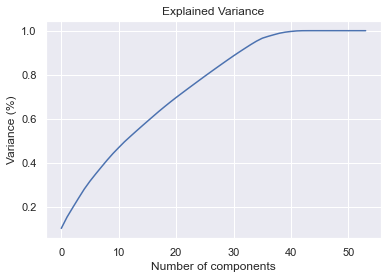

In [51]:
# We will now use PCA and then go again train the model to check the performance

from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x_pca)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [54]:
# pca
#principalComponents
pca.explained_variance_ratio_

array([1.02551456e-01, 5.12171441e-02, 4.33089459e-02, 4.23975369e-02,
       4.13819208e-02, 3.62820746e-02, 3.28258670e-02, 3.17413025e-02,
       3.12534578e-02, 2.94040471e-02, 2.70367711e-02, 2.62046765e-02,
       2.38732194e-02, 2.34087283e-02, 2.31080017e-02, 2.27496376e-02,
       2.26305088e-02, 2.24864417e-02, 2.15271089e-02, 2.10187056e-02,
       2.03506645e-02, 1.95989626e-02, 1.95606167e-02, 1.92467909e-02,
       1.92163158e-02, 1.91853966e-02, 1.88023686e-02, 1.87030358e-02,
       1.84892904e-02, 1.83464520e-02, 1.80141649e-02, 1.74599916e-02,
       1.69505897e-02, 1.67419456e-02, 1.55966286e-02, 1.32539042e-02,
       8.26669103e-03, 7.38874257e-03, 6.98752410e-03, 4.80885228e-03,
       3.26989019e-03, 2.32972179e-03, 8.70349778e-04, 1.21275521e-04,
       3.22823671e-05, 1.58332416e-31, 1.11085232e-31, 4.46994460e-32,
       3.28971343e-32, 2.30481562e-32, 1.70533419e-32, 9.04094201e-33,
       2.15326449e-33, 1.06120540e-33])

In [114]:
pca = PCA(n_components = 30)
new_pca = pca.fit_transform(x_pca)
pca_df = pd.DataFrame(data = new_pca)

In [115]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.879397,2.120448,-0.803668,0.084091,0.714489,-1.607691,0.461188,-0.982246,-0.923381,-0.672537,...,1.017274,0.136660,0.748613,-1.906526,1.298516,-3.929015,1.419358,-1.139922,-2.279644,0.354929
1,-2.358378,2.695490,-0.532332,-0.259506,0.771032,-1.078683,0.786599,0.262887,0.791414,0.346677,...,1.676016,-0.496786,0.061162,0.519904,-0.449937,0.963415,0.312280,0.304635,-0.158706,-0.010374
2,-1.491698,0.264147,-0.143822,-0.433898,0.225278,0.577915,1.751705,-0.632856,-1.853307,0.539405,...,2.034858,-0.354557,-0.044788,0.412098,-0.388685,0.985786,0.174451,0.254914,-0.090177,0.072357
3,-1.611909,0.560575,-0.362470,-0.295923,1.200893,-1.614785,0.858742,-1.012166,-0.690925,0.003662,...,-0.386208,-0.085898,0.458019,0.076958,-0.010879,0.223106,0.138228,-0.174419,-0.233887,0.088236
4,-1.673086,0.922416,1.181220,1.059222,0.394399,-0.889959,0.529497,-3.642485,0.598543,0.127419,...,1.925238,-0.344789,-0.011364,0.516269,-0.479728,1.001487,0.179308,0.302114,-0.146817,0.106094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.667976,1.342950,-1.082156,0.049240,-1.979864,0.146982,-1.103896,-1.032084,-2.839611,-1.841042,...,-1.684583,-0.042250,0.200176,0.625597,-0.999151,0.990921,0.351293,0.709680,0.068729,0.164911
41184,1.165311,0.749841,0.289958,-1.733589,-0.252939,-1.580858,-1.491715,-0.891004,-1.101459,-0.387101,...,-1.155782,0.284124,0.367348,0.193023,-0.168231,0.553541,0.222822,-0.151592,0.203279,-0.299669
41185,1.624619,1.123814,-0.711526,-0.368053,-1.739031,0.278089,-0.972686,-0.895370,-2.652615,-1.717449,...,-1.505640,0.002751,0.182626,0.613524,-0.892249,0.951238,0.319007,0.752544,0.038145,0.148649
41186,1.316740,-0.446103,-0.153756,-1.065081,-0.106824,-1.731455,-1.485330,-0.831385,-1.090611,0.128308,...,-1.126502,0.375590,0.790150,-0.043701,-0.037268,0.222584,0.573881,-0.185816,-0.023802,-0.478835


In [116]:
# Lets apply KNN with the best params obtained earlier to check the accuracy

#First we need to upsample our dataset

ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(pca_df, y)

In [136]:
pca_df.duplicated().sum()

2715

In [140]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [130]:
y_res.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [141]:
36548-4640

31908

In [142]:
31908+2715

34623

In [128]:
#print(dir(X_res))

X_res.duplicated().sum()

34623

In [147]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(X_res,y_res,test_size = 0.25, random_state = 25)

In [148]:
y_train_new.shape

(54822,)

In [149]:
# Using the new features on KNN and Logistic Regression

log_reg.fit(x_train_new,y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Accuracy on Logistic regression after PCA

In [150]:
log_reg.score(x_test_new,y_test_new)

0.7365656123454087

In [152]:
knn_new.fit(x_train_new,y_train_new)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [153]:
y_pred_knn = knn_new.predict(x_test_new)

#### Accuracy with KNN after PCA

In [154]:
knn_new.score(x_test_new,y_test_new)

0.9024844040713582

# Create a model using Random Forest bagging classifier 



In [159]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
# We Will use the new_data dataframe for the random forest classifier since we do not need to scale the data

In [157]:
new_data.head()

,age,education,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,2.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.0,5.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,5.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.0,3.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56.0,5.0,1.0,1.0,999.0,0.0,1.0,94.0,-36.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [165]:
# Need to balance the dataset since the 0 instances for the target variable in very high in comparison to the 1 instances

ros_rf = RandomOverSampler(random_state=355)
X_res_rf, y_res_rf = ros_rf.fit_resample(new_data, y)

In [166]:
X_res_rf.shape, y_res_rf.shape

((73096, 54), (73096,))

In [167]:
y_res_rf.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [168]:
x_train_rand,x_test_rand,y_train_rand,y_test_rand = train_test_split(X_res_rf,y_res_rf,test_size= 0.25,random_state = 355)

In [176]:
#x_train_rand.shape
#x_test_rand.shape
#y_train_rand.shape
#y_test_rand.shape

In [182]:
rnd = RandomForestClassifier(n_estimators=10,max_features='sqrt',oob_score=True,n_jobs=-1,random_state=10,verbose=3)

In [183]:
rnd.fit(x_train_rand,y_train_rand)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
C:\Users\Anu\.conda\envs\webscrapperprj\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Anu\.conda\envs\webscrapperprj\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=10, verbose=3,
                       warm_start=False)

In [184]:
rnd.score(x_test_rand,y_test_rand)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9604903141074751

In [185]:
y_new_pred_rf = rnd.predict(x_test_rand)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [187]:
acc_new = accuracy_score(y_test_rand,y_new_pred_rf)
acc_new

0.9604903141074751

#### Accuracy with Random forest has improved to 96%

In [188]:
np.unique(y_new_pred_rf,return_counts=True)

(array([0, 1], dtype=int64), array([8505, 9769], dtype=int64))

In [189]:
con_new = confusion_matrix(y_test_rand,y_new_pred_rf)
con_new

array([[8457,  674],
       [  48, 9095]], dtype=int64)

# Create a model using Extreme Randomized Forest bagging classifier

In [191]:
from sklearn.ensemble import ExtraTreesClassifier

In [203]:
rnd_e= ExtraTreesClassifier(n_estimators=10,max_features='sqrt',bootstrap=True,oob_score=True,n_jobs=-1,random_state=10,verbose=3)

In [204]:
rnd_e.fit(x_train_rand,y_train_rand)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10
building tree 7 of 10
building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
C:\Users\Anu\.conda\envs\webscrapperprj\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Anu\.conda\envs\webscrapperprj\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=True, random_state=10, verbose=3,
                     warm_start=False)

In [205]:
y_pred_e = rnd_e.predict(x_test_rand)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [206]:
accuracy_score_e = accuracy_score(y_test_rand,y_pred_e)
accuracy_score_e

0.9546350005472256

In [198]:
rnd_e.score(x_test_rand,y_test_rand)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9546350005472256

#### Accuracy Score for extremized random forest: 95.46%

### Final Observation:

After using multiple algorithms, we can find that the best accuracy was given by the model using the Random forest algorithm - 96%. Hence we can use this model for our future predictions for this problem statement.

***********************************************